# Optymalizacja ciągła
## Algorytm stochastycznego spadku wzdłuż gradientu

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression
%matplotlib inline
from helpers import *

Gotowa implementacja metody Cauchy'iego.

In [2]:
def golden_proportion_method(function, a=-10, b=10, epsilon=1e-8, max_steps=1000):
    alpha = (5 ** 0.5 - 1) / 2
    steps = 0
    xl = alpha * a + (1 - alpha) * b
    xr = (1 - alpha) * a + alpha * b
    fxl = function(xl)
    fxr = function(xr)

    while b - a > epsilon:
        m = (b + a) / 2
        if fxl < fxr:
            b = xr
            xr = xl
            fxr = fxl
            xl = alpha * a + (1 - alpha) * b
            fxl = function(xl)
        else:
            a = xl
            xl = xr
            fxl = fxr
            xr = (1 - alpha) * a + alpha * b
            fxr = function(xr)
        steps += 1
        if steps >= max_steps:
            break
    return (a + b) / 2

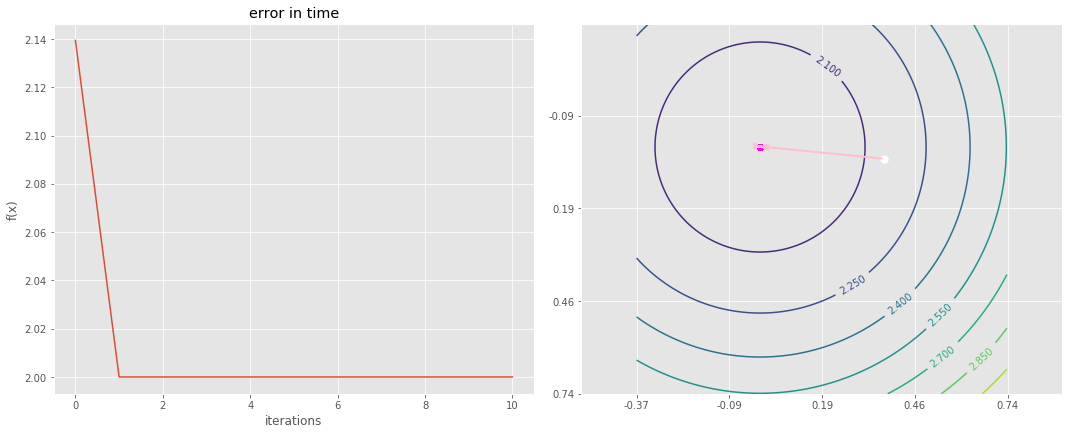

In [3]:
from helpers_ml import plot_gd_1d,  plot_gd_2d, plot_f_in_time_multi

def run_cauchy(f, gradient, initial_x):
    """
    Algorytm Cauchy'iego dla funkcji n wymiarowych
    Wejście: 
       f (vector_x)- funkcja do optymalizacji
       gradient (vector_x)- gradient funkcji do optymalizacji
       initial_x - >wektor< koordynat punktu startowego
    Wyjście: minimum funkcji f
    """
    x_in_time = [initial_x] #historia odwiedzonych punktów
    x = np.copy(initial_x) #przepisanie początkowego wektora koordynat do x
    D = initial_x.shape[0] #liczba wymiarów problemu
    for i in range(10):
        alphax = golden_proportion_method(lambda alpha: f(x-alpha*gradient(x)) ,0,10)
        x-=alphax*gradient(x)
        x_in_time.append(np.copy(x))
    #rysuj wynik
    if D==1:
        plot_gd_1d(f, x_in_time)
    else:
        plot_gd_2d(f, x_in_time, contours=True)
    
f = lambda x: sum(x ** 2)  +2
gradient = lambda x: 2 * x

run_cauchy(f, gradient, initial_x = np.random.rand(2))

## Zadanie 1
Zaimplementuj metodę spadku wzdłuż gradientu.

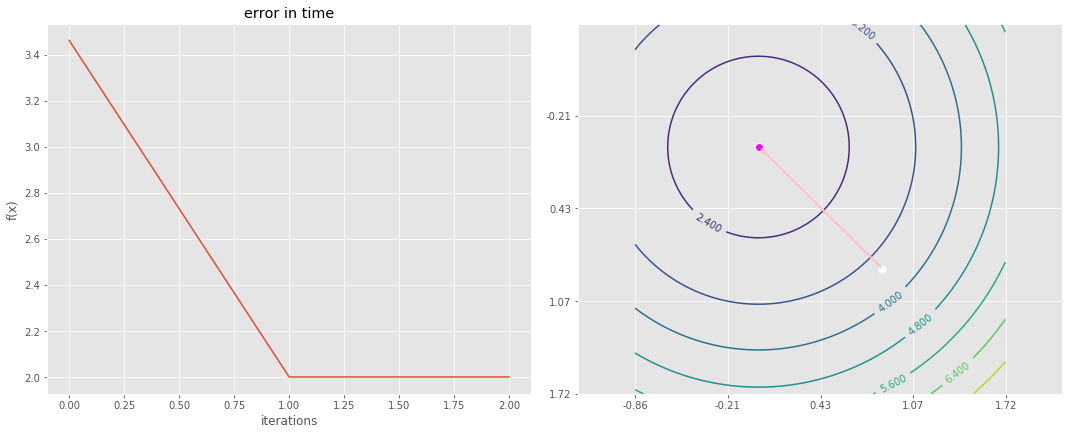

In [25]:
def run_gd(f, gradient, eta, initial_x):
    """
    Algorytm spadku wzdłuż gradientu dla funkcji n wymiarowych
    Wejście: 
       f (vector_x)- funkcja do optymalizacji
       gradient (vector_x)- gradient funkcji do optymalizacji
       eta - długość kroku
       initial_x - >wektor< koordynat punktu startowego
    Wyjście: minimum funkcji f
    """
    x_in_time = [initial_x] #historia odwiedzonych punktów
    x = np.copy(initial_x) #przepisanie początkowego wektora koordynat do x
    D = initial_x.shape[0] #liczba wymiarów problemu
    for i in range(1000):
        grad = gradient(x)
        x -= eta*grad;
        # TWÓJ KOD TUTAJ 
        # Po każdej aktualizacji x dodaj linijkę 
        #     x_in_time.append(np.copy(x))
        # aby uzwględnić zmianę na rysunku
        x_in_time.append(np.copy(x))
        if(np.max(np.abs(grad))<1e-5):
            break
    #rysuj wynik
    if D == 2:
        plot_gd_2d(f, x_in_time, contours=True)
    else:
        plot_gd_1d(f, x_in_time)
    return x_in_time
    
f = lambda x: sum(x ** 2 ) +2
gradient = lambda x: 2 * x

_ = run_gd(f, gradient, 0.5, initial_x = np.random.rand(2))

**Zadanie:**  Zainicjalizuj punkt startowy losowo oraz przetestuj algorytm dla różnych wartości długości kroku dla funkcji jednowymiarowych. 

Sugerowane wartości długości kroku:
* 1.5
* 1
* 0.99
* 0.5
* 0.01

Sugerowane funkcje:
* $x^2 + 5x$.
* $10x^2 + 5x$.
* $sin(x)$.

ValueError: x and y can be no greater than 2-D, but have shapes (100, 1) and (100, 1, 1)

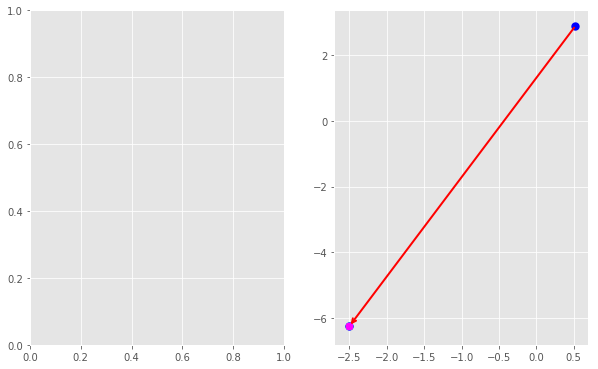

In [7]:
f = lambda x: x**2 + 5*x#TWÓJ KOD TUTAJ
gradient = lambda x: 2*x +5#TWÓJ KOD TUTAJ

_=run_gd(f, gradient, 0.5, initial_x = np.random.rand(1))

**Zadanie:** Dodaj do powyższego kodu jakiś "porządny" warunek stopu - ustawianie na sztywno 10 iteracji raczej nie jest profesjonalną praktyką. Warto zastosować dwa warunki stopu: jeden np. max. 1000 iteracji (maksymalny budżet czasowy) oraz drugi zatrzymujący proces optymalizacyjny szybciej jeśli to możliwe.


**Zadanie:**  Powtórz ćwiczenie dla funkcji dwuwymiarowych. Sugerowane wartości długości kroku:
* 1.5
* 1
* 0.99
* 0.5
* 0.01

Sugerowane funkcje:
* $f(x,y) = x^2 + y^2$.
* $f(x,y) = x^2 + 10y^2$.
* $f(x,y) = x^2 + 100y^2$.
* $f(x,y) = 2x^2 + 1y^2 + xy +2x + y$.
* $f(x,y) = \sin(x) + \sin(y)$.

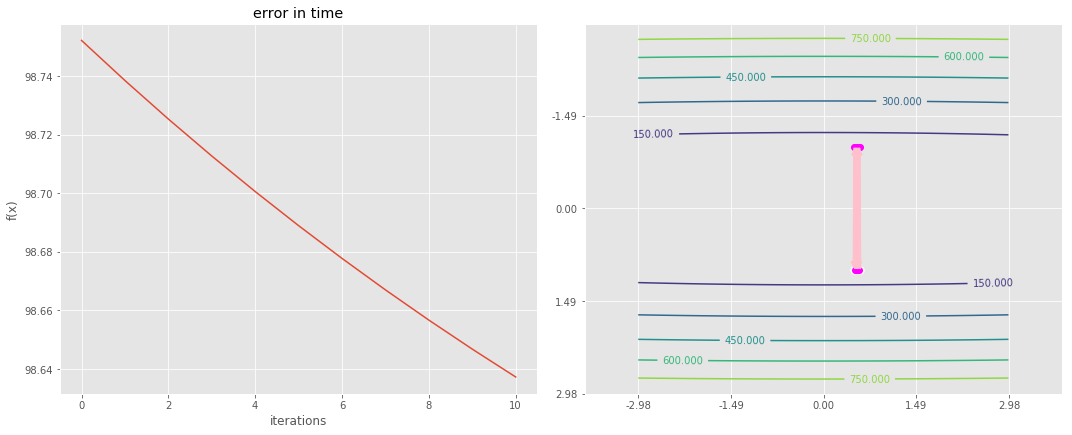

In [24]:
A = np.array([[1,0],[0,100]])

f = lambda x: x.T@A@x#TWÓJ KOD TUTAJ
gradient = lambda x: 2*A@x#TWÓJ KOD TUTAJ
_=run_gd(f, gradient, 0.01, initial_x = np.random.rand(2))


Do twoich testów możesz użyć również funkcji `plot_f_in_time_multi(funkcja_celu, lista_x, labels)`, która rysuje funkcje celu dla kilku przebiegów algorytmów `x_in_time`. Argumenty funkcji to kolejno funkcja celu, lista różnych `x_in_time` oraz lista nazw kolejnych przebiegów.

Na przykład, aby uruchomić algorytm GD kilka razy dla różnych $\eta$ i narysować ich przebiegi możesz użyć:
```
initial_point = np.random.rand(2)
etas = [0.001, 0.005,.....  #Twoja lista
lista_x = [run_gd(f, gradient, eta, initial_x = initial_point) for eta in etas]
plot_f_in_time_multi(f, lista_x, etas)
```

Dodatkowo funkcja ma parametry `log_scale` (True/False) rysujący wykres w skali logarytmicznej oraz `plot_starting_from` i `plot_ending_at` pozwalający na rysowanie wybranego zakresu iteracji.

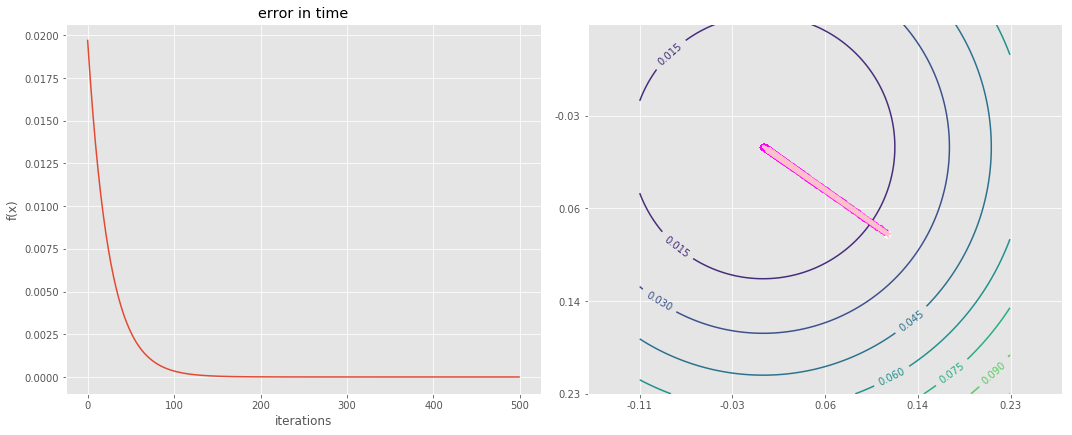

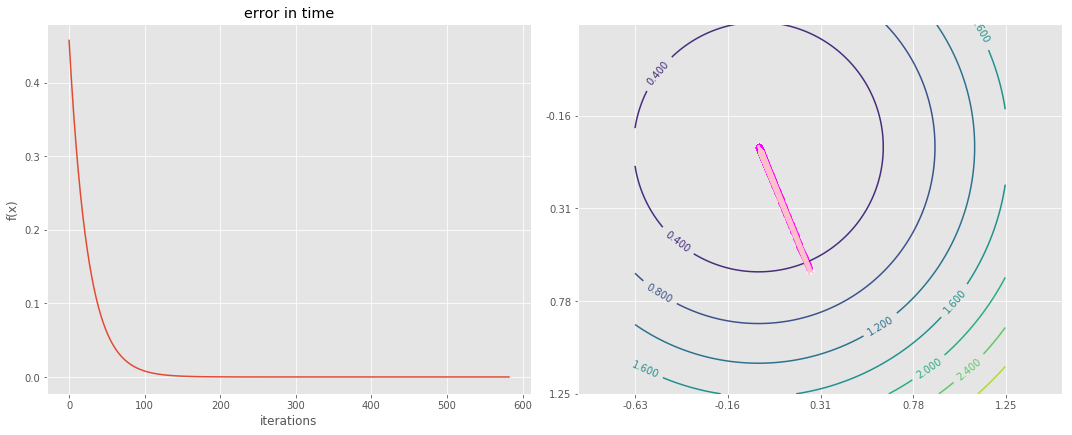

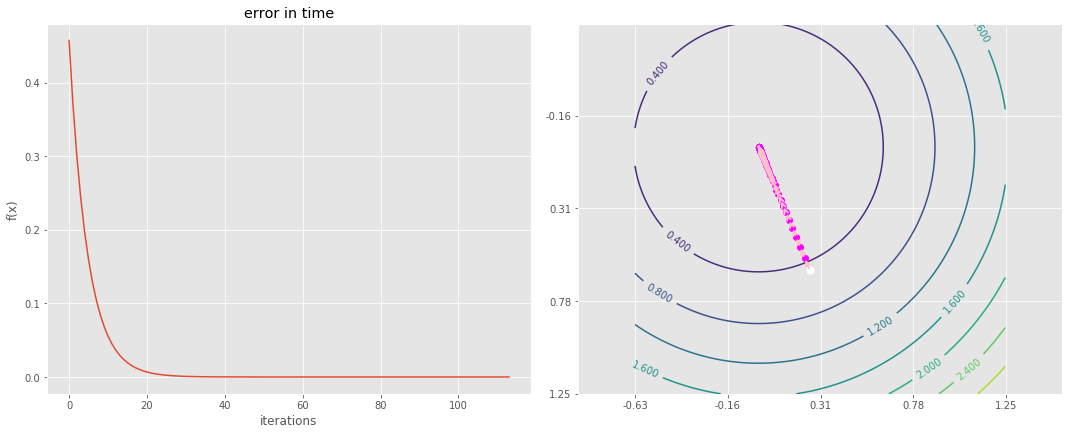

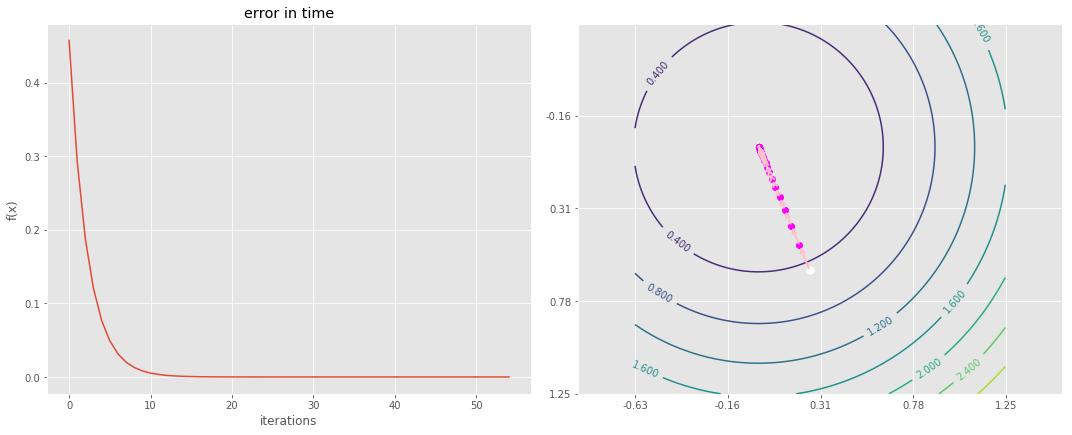

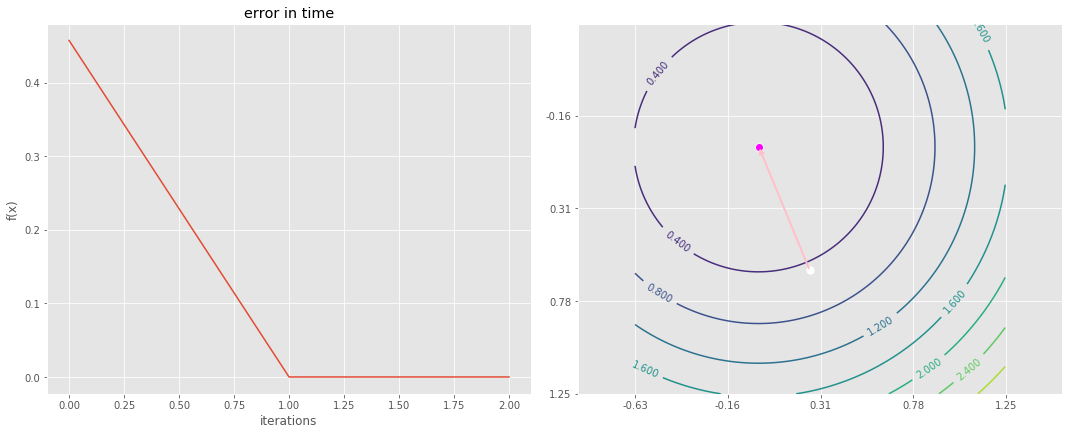

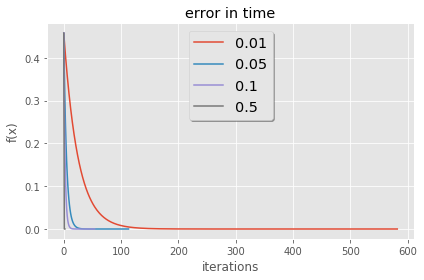

In [28]:
A = np.array([[1,0],[0,1]])

f = lambda x: x.T@A@x#TWÓJ KOD TUTAJ
gradient = lambda x: 2*A@x#TWÓJ KOD TUTAJ
_=run_gd(f, gradient, 0.01, initial_x = np.random.rand(2))

initial_point = np.random.rand(2)
etas = [0.01, 0.05, 0.1, 0.5] 
lista_x = [run_gd(f, gradient, eta, initial_x = initial_point) for eta in etas]
plot_f_in_time_multi(f, lista_x, etas)

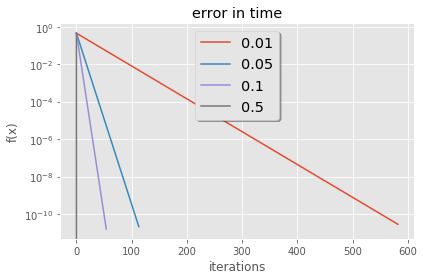

In [29]:
plot_f_in_time_multi(f, lista_x, etas, log_scale=True)

## Zadanie 2

Rozpoczniemy ćwiczenia od przykładu regresji liniowej prostej $y=ax+b$ czyli takiej z tylko 1 zmienną objaśniającą ($x$). Problem nie jest trudny, ale ponieważ optymalizowana przestrzeń jest dwuwymiarowa ($a$ i $b$: waga dla $x$ oraz stała) będziemy mogli zwizualizować proces optymalizacyjny.

Wygenerujmy sztuczne dane do jednowymiarowej regresji liniowej

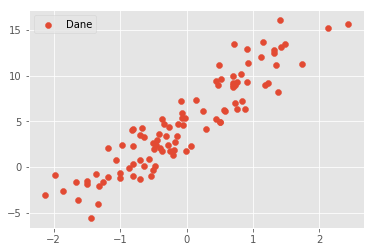

In [30]:
X_train,y_train = generate_data()

Korzystając z naszej wcześniejszej wiedzy o mnożeniu wektorów,  równanie regresji wygląda w następujący sposób:
$$\hat{y}=\beta_0+\mathsf{x}^T\mathsf{\beta} $$
Aby jeszcze uprościć ten zapis dodajemy do wektora $\mathsf{x}$ sztuczną, dodatkową wartość równą jeden. Pozwala nam to na wpisanie stałej $\beta_0$ do wektora $\beta$ i dalsze uproszczenie zapisu:
$$\hat{y}=\mathsf{x}^T\beta $$
Dopiszmy więc do naszej macierzy `X_train` nową kolumnę pełną jedynek, aby móc skorzystać z uproszczonej notacji

In [31]:
X_train_bias = np.c_[np.ones(X_train.shape[0]),X_train]

Zaimplementuj też funkcję celu czyli błąd kwardatowy $$SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2
=\sum_{i=1}^n (y_i-\mathsf{x}_i^T\beta)^2$$
Powyższy wzór iteruje po parach obserwacji $(mathsf{x}_i, y_i)$. W tym zadaniu wszystkie obserwacje $mathsf{x}_i$ są ułożone jako kolejne wiersze macierzy `X_train`, a wszystkie $y_i$ jako kolejne elementy wektora `y`.

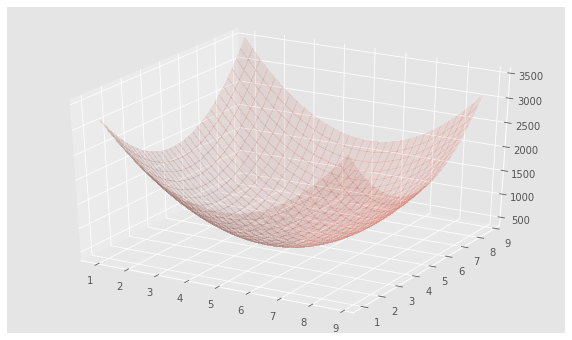

In [37]:
def cost_function(X, y, beta):
    error = 0
    for i in range(0,X.shape[0]):
        error += (y[i] - X[i]@beta)**2
    return error  #TWÓJ KOD TUTAJ

#Wizualizacja błędu
plot_3d_linear_regression(X_train_bias, y_train, cost_function)

Jak widać problem jest wypukły :) Zwróć uwagę, że na osiach wykresu masz wagi regresji liniowej: odpowiednio $a$ i $b$ we wzorze $\hat{y}=ax+b$. Wysokość wykresu opisuje błąd popełniany przez regresję na całym zbiorze treningowym dla danego ustawienia wag regresji. Naszym zadaniem jest znalezienie najlepszej regresji czyli takich wag $a$ i $b$, aby wzór $\hat{y}=ax+b$ popełniał jak najmniejsze błędy.

Uzupełnij poniższą implementację algortmu spadku wzdłuż gradientu. 

**UWAGA: zmiana oznaczeń** - w problemie regresji optymalizujemy $\beta$ (wagi we wzorze) a nie x (nasze dane)!

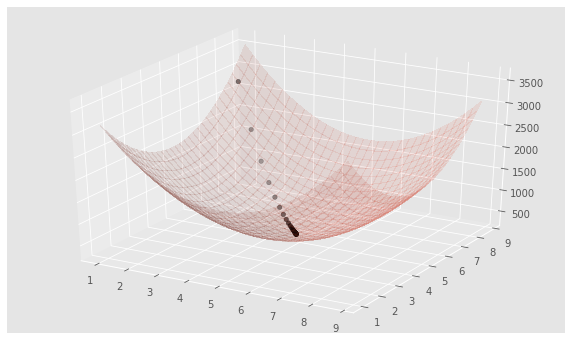

Cost at minimum 383.6126816016031


In [40]:
def gradient_descent(X, y, beta0, iters, eta):
    beta = np.array(beta0)    # wartość początkowa
    history = []      # historyczne rozwiązania (kolejne wektory beta)
    costs = []        # historyczne jakości rozwiązań
    
    for i in range(iters):
        #Dodaj informacje historyczne (na potrzeby rysowania wykresu)
        history.append(np.copy(beta))
        cost = cost_function(X, y, beta)
        costs.append(cost)
        #Właściwa część algorytmu - TWÓJ KOD TUTAJ
        grad = 0
        for i in range(0,X.shape[0]):
            grad += ((y[i] - X[i]@beta)*2)*X[i].T
        beta -= eta*(-grad)

    return history, costs

history_gd, costs = gradient_descent(X_train_bias, y_train, 
                                        beta0 = [1.2, 8], 
                                        iters = 30, 
                                        eta = 0.001)
plot_3d_linear_regression(X_train_bias, y_train, cost_function, history_gd)
print("Cost at minimum", min(costs))

Narysuj uzyskany wynik

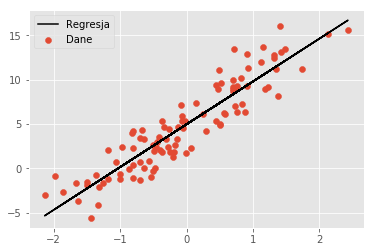

In [41]:
from helpers import plot_reg
plot_reg(X_train_bias, y_train, beta=history_gd[-1])

## Zadanie 3

Teraz pora na implementację algorytmu stochastycznego spadku wzdłuż gradientu

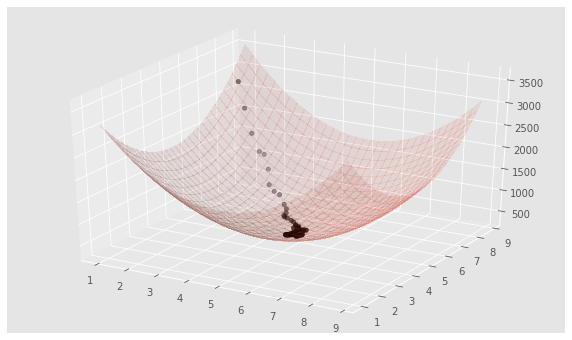

Cost at minimum 383.72626322300863


In [45]:
def stochastic_gradient_descent(X, y, beta0, iters, eta):
    beta = np.array(beta0)    # wartość początkowa
    history = []      # historyczne rozwiązania (kolejne wektory beta)
    costs = []        # historyczne jakości rozwiązań
    
    for i in range(iters):
        #Dodaj informacje historyczne (na potrzeby rysowania wykresu)
        if i % 10 == 0:
            history.append(np.copy(beta))
            cost = cost_function(X, y, beta)
            costs.append(cost)
        #Właściwa część algorytmu - TWÓJ KOD TUTAJ
        i = np.random.randint(0, X.shape[0])
        grad = ((y[i] - X[i]@beta)*2)*X[i].T
        beta -= eta*(-grad)
        

    return history, costs

np.random.seed(1)
history_sgd, costs = stochastic_gradient_descent(X_train_bias, y_train, 
                                        beta0 = [1.2, 8], 
                                        iters = 1000, # Jedna iteracja algorytmu to tylko jeden przykład uczący
                                        # więc 1000 iteracji przy 100-elementowym zbiorze to tylko
                                        # 10 iteracji algorytmu spadku gradientu
                                        eta = 0.005)
plot_3d_linear_regression(X_train_bias, y_train, cost_function, history_sgd)
print("Cost at minimum", min(costs))

Poniżej masz gotowy kod pokazujący animacje procesu optymalizacyjnego. Podstaw pod `history` odpowiednią wartość aby zobaczyć jak wyglądają kolejne rozwiązania problemu regresji w algorymach GD i SGD.


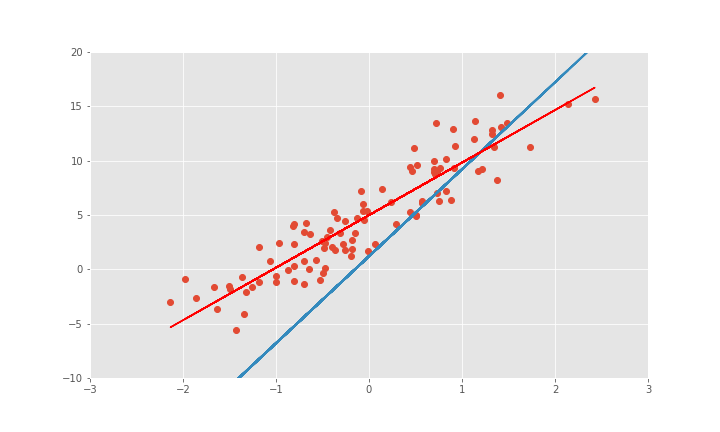
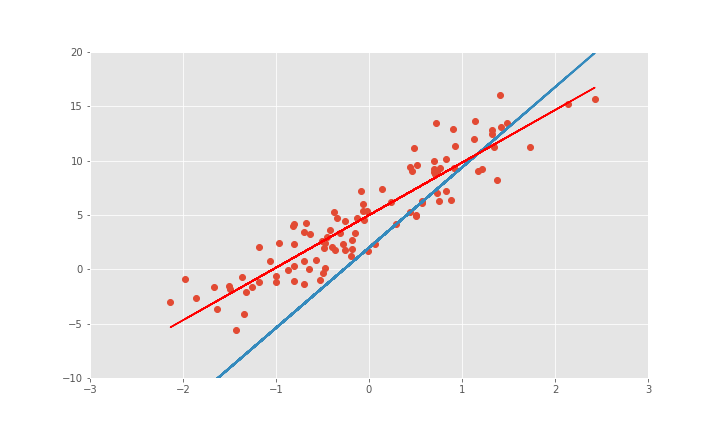
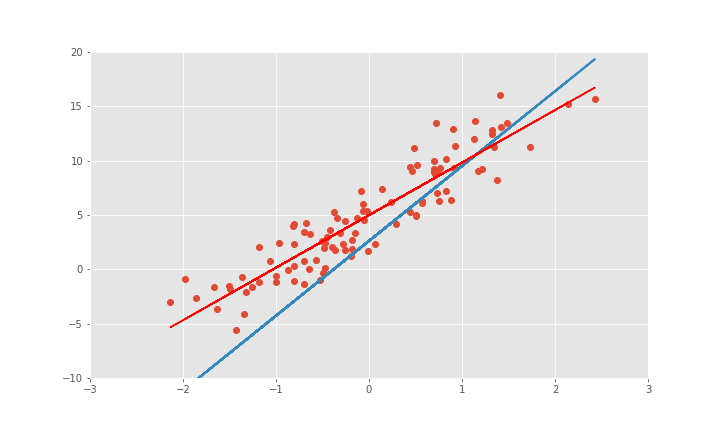
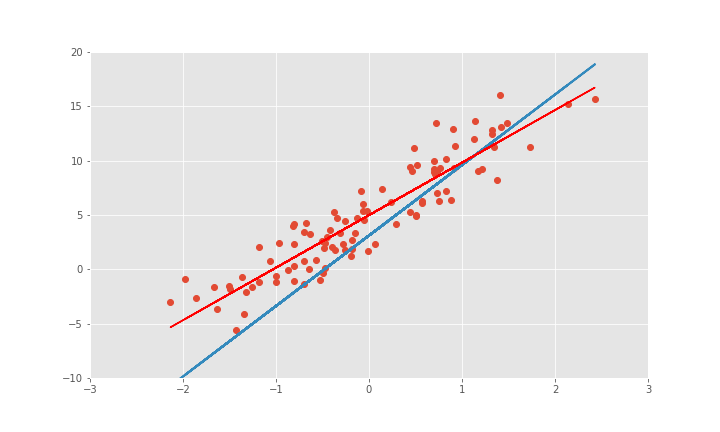
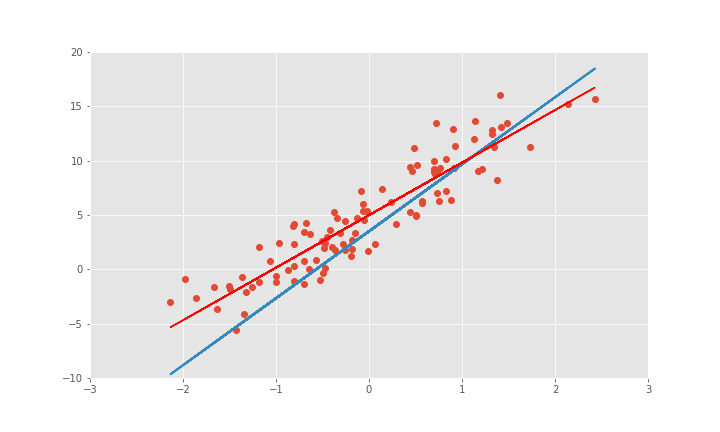
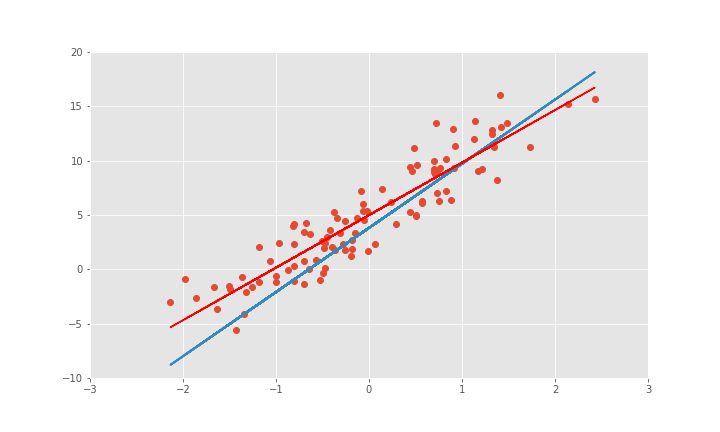
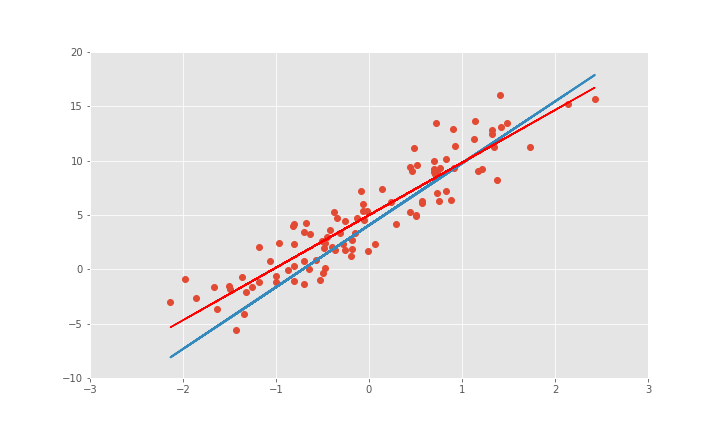
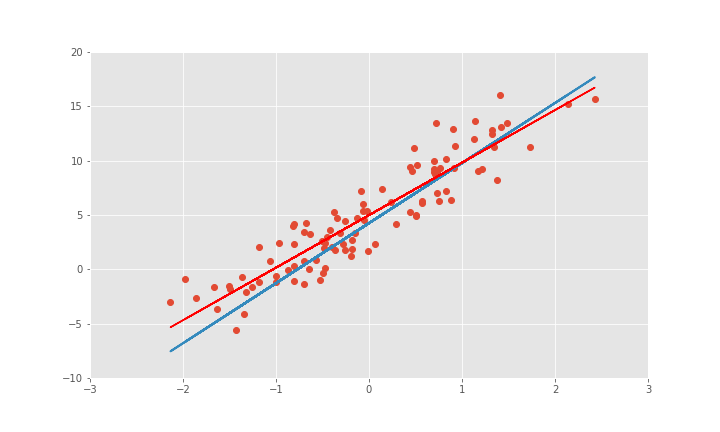
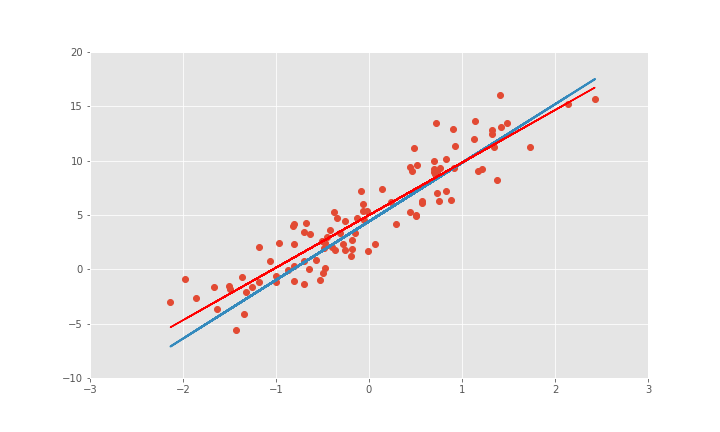
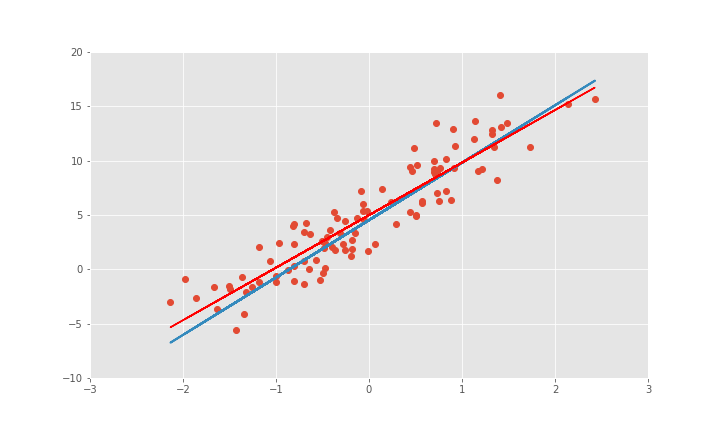
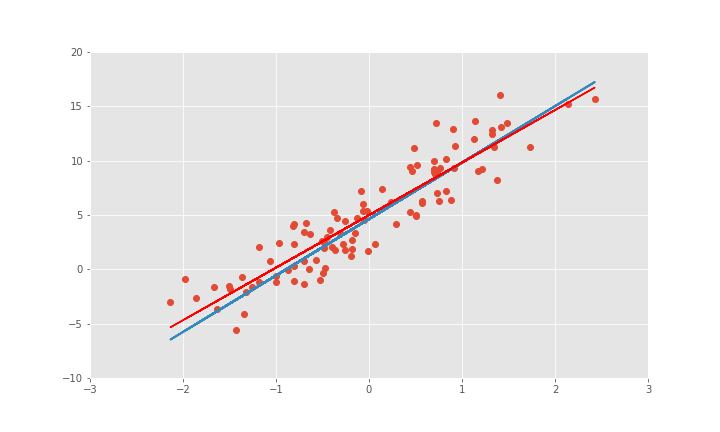
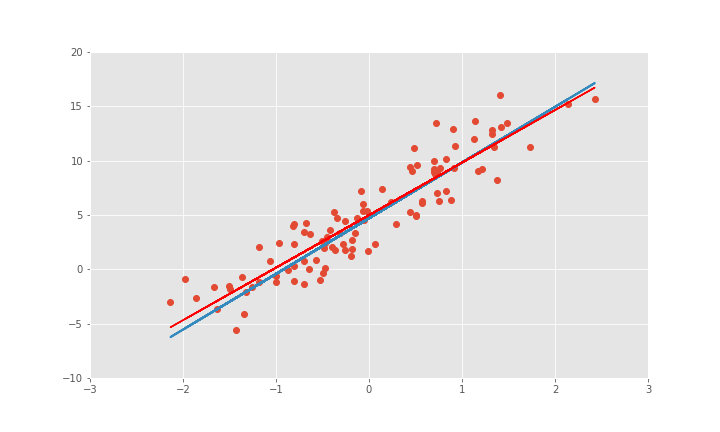
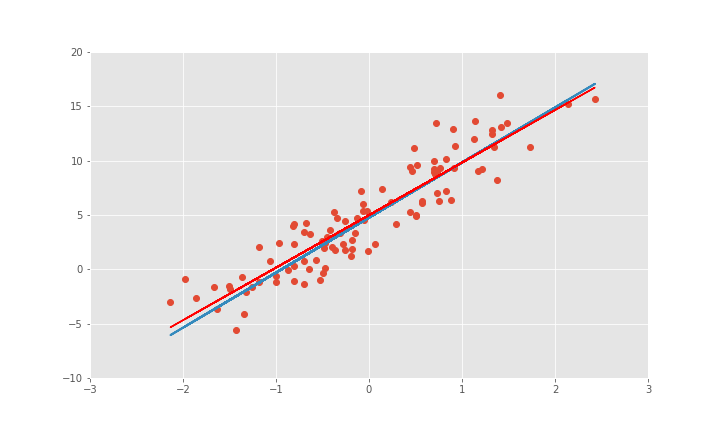
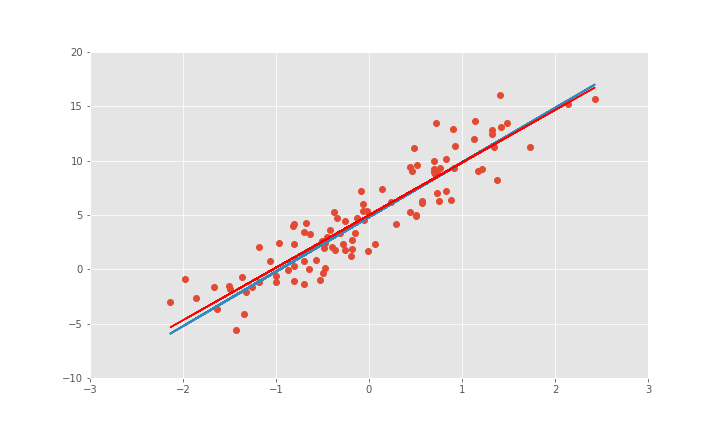
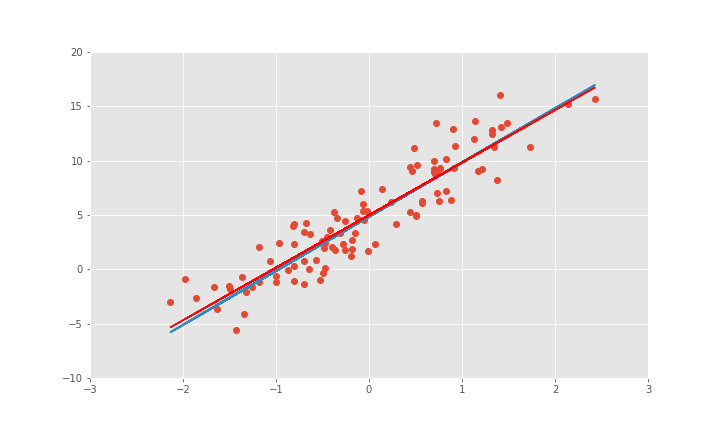
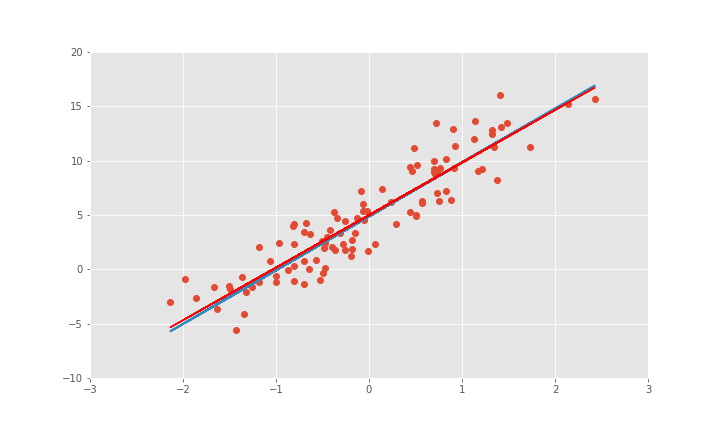
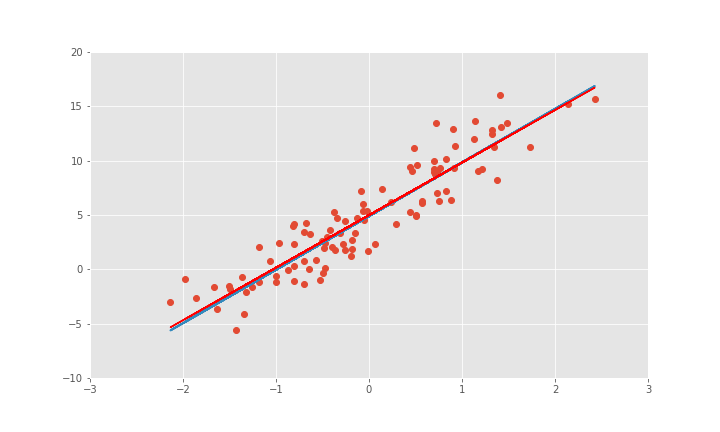
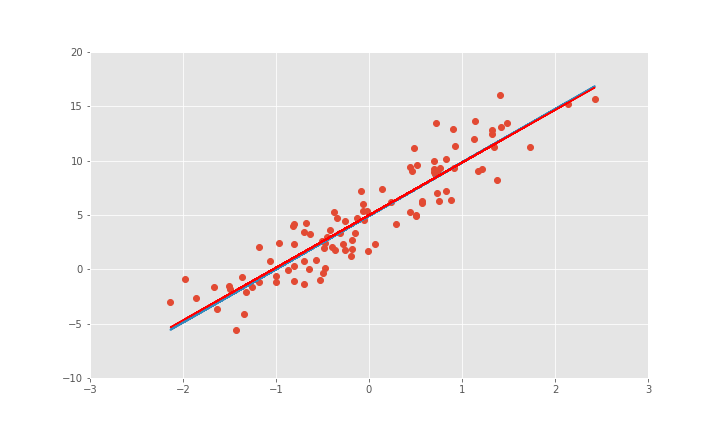
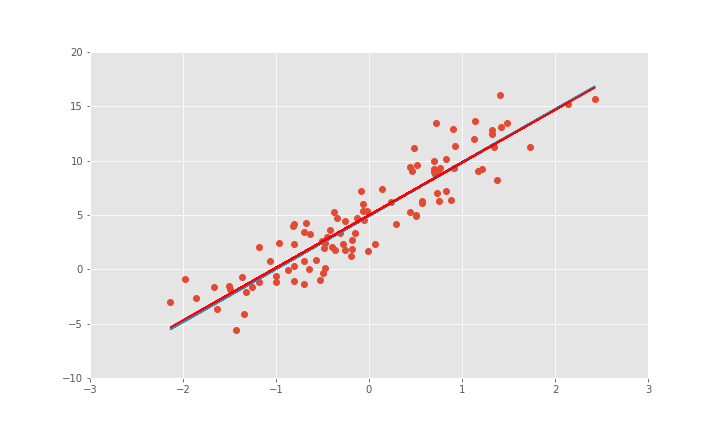
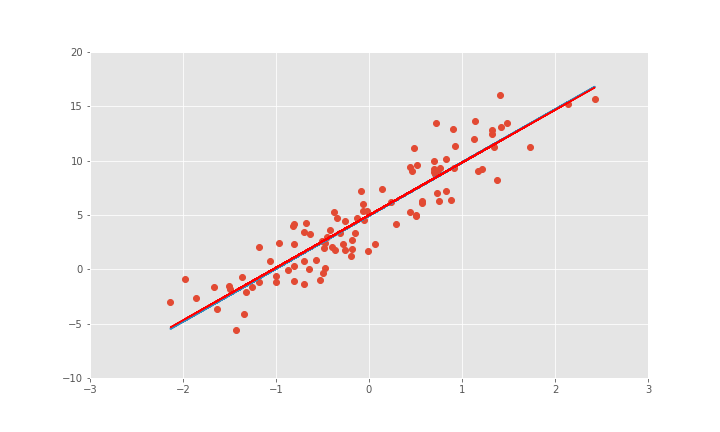
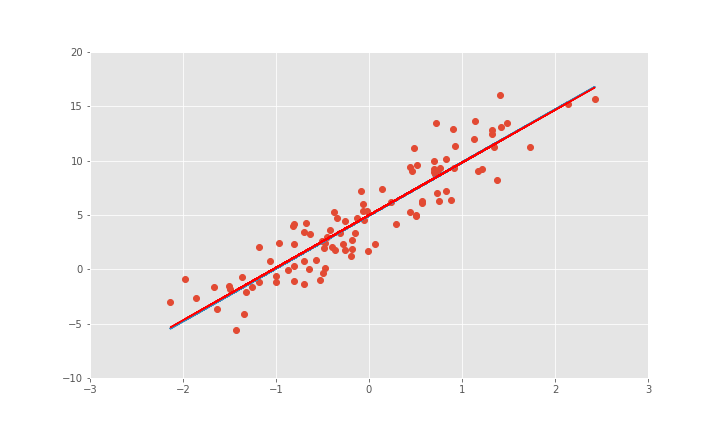
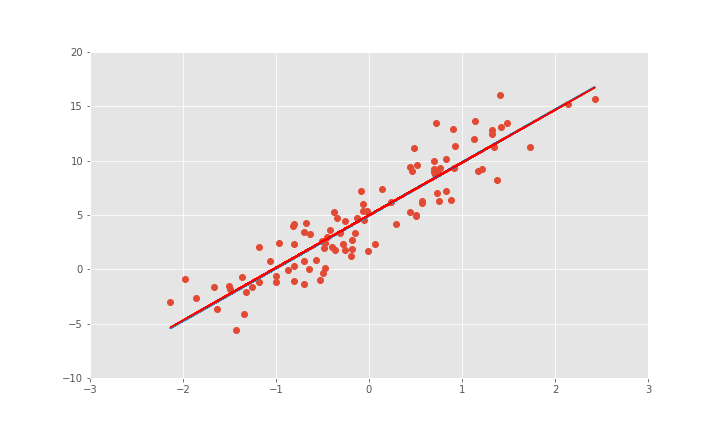
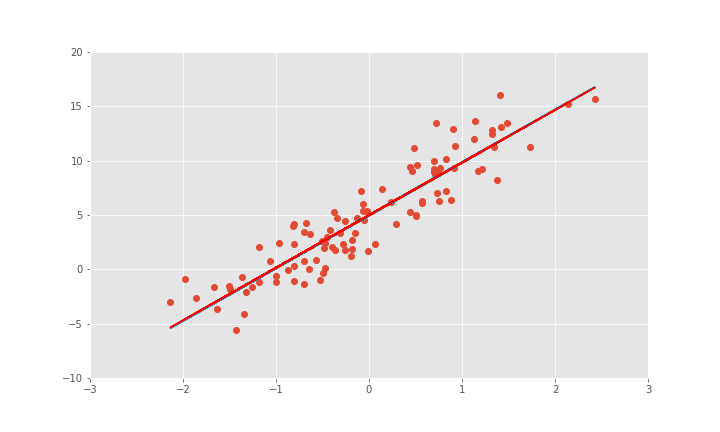
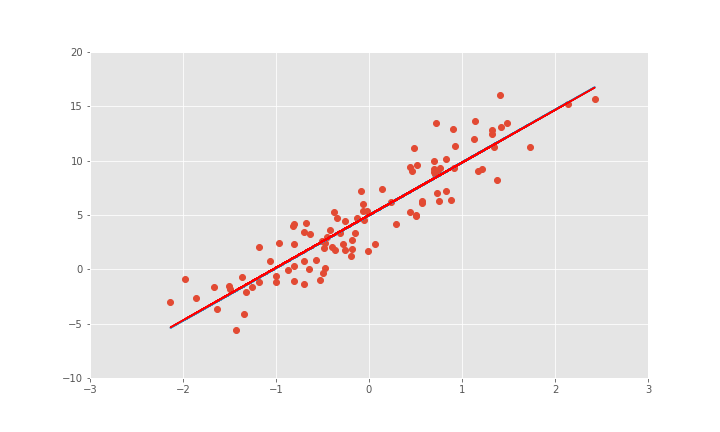
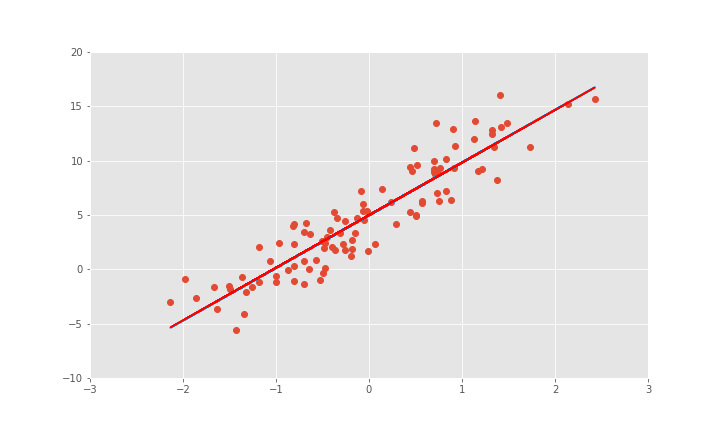
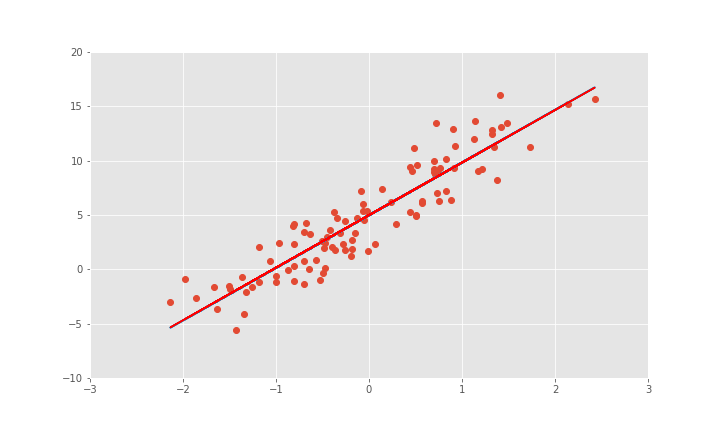
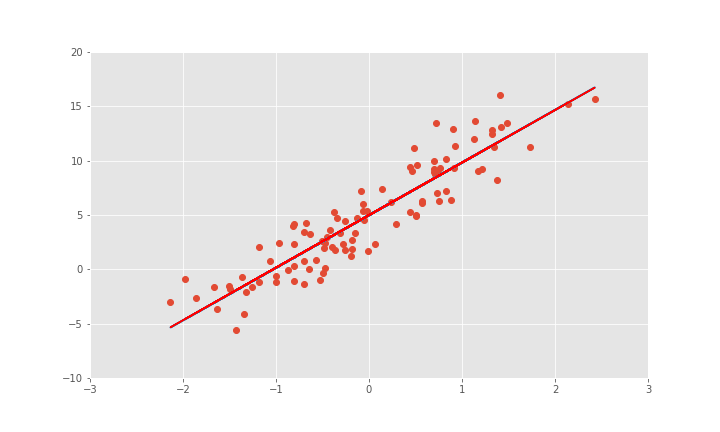
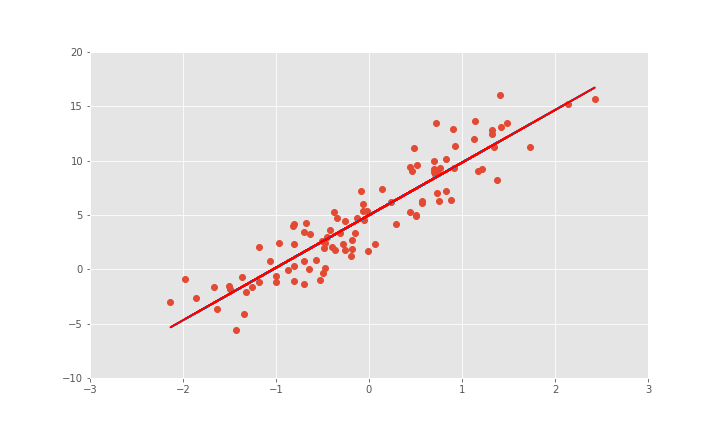
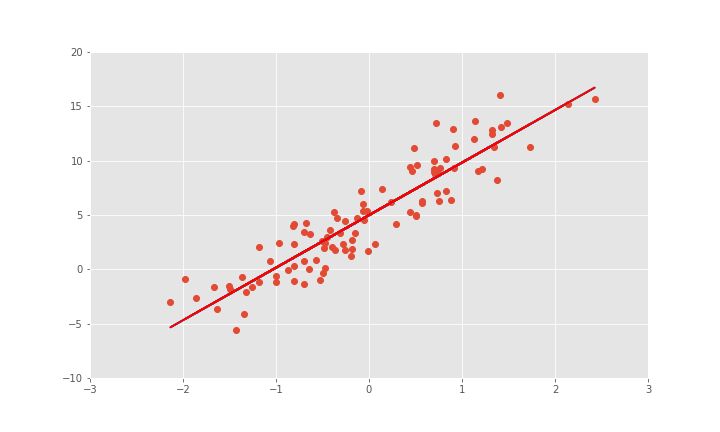
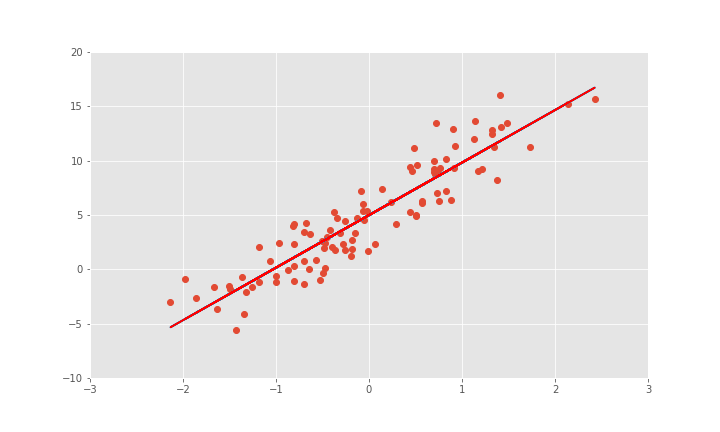

In [47]:
#Sterowanie wyświetlaniem: do history możesz wstawić history_gd albo history_sgd dla animacji tych algorytmów
history = history_gd

#Kod animacji, zmiany niepotrzebne
def init():
    line.set_data([], [])
    return line,

def animate(i):
    theta = history[i].reshape((-1,1))
    line.set_data(X_train[:, 0], np.dot(X_train_bias, theta))
    return line,

theta = history[-1]
best_fit_gradient_descent = theta[0] + X_train[:,0] * theta[1]
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X_train[:,0], y_train, 'o')
line, = ax.plot([], [], lw=2)
plt.plot(X_train[:,0], best_fit_gradient_descent, 'k-', color = "r")
animation.FuncAnimation(fig, animate, init_func=init,
                            frames=len(history), interval=100)

*Animacja bazuje na materiałach kursu MTH 594: Advanced data mining: theory and applications przygotowanych przez Dmitry Efimov, American University of Sharjah*

### Zadanie 4
Przy wyprowadzeniu gradientu na kratce można się łatwo pomylić - co więcej, źle policzony gradient wstawiony do algorytmu spadku wzdłuż gradientu nadal może (nieoptymalnie) "działać". Z tego powodu zawsze warto przetestować implementacje gradientu.

Przetestuj twoją impelmentację gradientu poprzez przybliżenie go numerycznie wzorem:
$$f'(x) \approx  \frac{f(x+ \epsilon)- f(x-\epsilon)}{2\epsilon}$$
(Tak, musisz aproksymować każdy element gradientu osobno!)
a następnie oblicz błąd względny
$$error = \frac{|f'(x) - \tilde{f}'(x)|}{\max \{ |f'(x) |,| \tilde{f}'(x)| \}}$$
Błąd względny wyższy niż $1\%$ prawie na pewno oznacza błędną implementację gradientu, przy prawidłowej implementacji gradientu powinieneś uzyskiwać błąd znacznie niższy. Zabezpiecz się przed problemem dzielenia przez zero.


In [ ]:
def calc_gradient(X, y, beta):
    ### TWÓJ KOD TUTAJ
    # Implementacja gradientu wyznaczona analitycznie (przeklej z Twojej implementacji GD)
    return ...

def approx_gradient(X, y, beta):
    # Przybliżenie gradientu numeryczne
    epsilon = 10**-5
    gradient = np.zeros(beta.shape)
    for i in range(len(beta)): #Uzupełniaj kolejne elementy gradientu
        #TWÓJ KOD TUTAJ
       
        gradient[i] = ...
        
    return gradient

def relative_error(my_gradient, approx_gradient):
    # Oblicz względny błąd pomiędzy dwoma wektorami
    #TWÓJ KOD TUTAJ
    
    error = ...
    print("Informacje o błędzie: min: {0}, max: {1}, avg: {2}".format(np.min(error), np.max(error), np.mean(error)))
          
my_gradient = calc_gradient(X_train_bias , y_train, np.zeros(X_train_bias.shape[1]))
approx_gradient = approx_gradient(X_train_bias, y_train, np.zeros(X_train_bias.shape[1]))
relative_error(my_gradient, approx_gradient)


### Zadanie 5: Regresja liniowa na prawdziwych danych

Dane zostały zerbrane podczas spisu powszechnego w Stanach Zjednoczonych i dotyczą predykcji ceny domu w danym regione bazując na informacjach o czynniach demograficznych czy aktualnej sytuacji lokalnego rynku nieruchomości. Macierz `X_house` zawiera w swoich wierszach informacje o kolejnych regionach, a wektor `y` zawiera medianę ceny domu w danym regionie USA. Twoim zadaniem jest zbudować model regresji liniowej na podstawie którego będziesz w stanie przewidzieć medianę ceny domu w regionie na podstawie informacji demograficznych i ekonomicznych.

In [48]:
X_house = np.genfromtxt('data/house-X.csv', delimiter=',', skip_header=True)
y_house = np.genfromtxt('data/house-Y.csv', delimiter=',', skip_header=True)
print(X_house.shape)
print(y_house.shape)

(22684, 16)
(22684,)


Zaimplementuj metodę stochastycznego spadku wzdłuż gradientu dla podanego problemu (jest on bardzo podobny do poprzedniego ćwiczenia). 

W praktyce nie losujemy indeksu kolejnego elementu, ale iterujemy po zbiorze danych uprzednio posortowanym w *losowej* kolejności (odczyt sekwencyjny jest szybszy). Zacznij więc swoją implementację od takiego posortowania zbioru danych. Pamiętaj też, że jeżeli chcesz stosować uproszczoną notację $y=x^T\beta$ musisz dodać do zbioru danych kolumnę jedynek.

Twoje operacje na danych:

In [ ]:
X_house = np.random.shuffle(Z_house)
np.c_[np.ones(X_train.shape[0]),X_train]

Twoja implementacja algorytmu:

In [ ]:
from collections import defaultdict

def stochastic_gradient_descent(X, y, max_iter, eta):
    historical_data = defaultdict(list)
    historical_data['X'] = X
    historical_data['y'] = y
    
    beta = np.random.rand(X.shape[1])

    for t in range(max_iter):
        #TWÓJ KOD TUTAJ
        
        
        #Zapisz dane historyczne: aktualne rozwiązanie, prędkość optymalizacji oraz wartość gradientu
        historical_data['solutions'].append(beta)
        historical_data['eta_history'].append(eta)
        historical_data['gradients'].append(gradient)
    historical_data['final_solution'] = beta
    return historical_data


historical_data = stochastic_gradient_descent(X_house, y_house, 
                                        max_iter = int(X_house.shape[0]),
                                        eta = 0.001)

In [ ]:
from helpers import plot_algorithm_stats
plot_algorithm_stats(historical_data, cost_function)

Prawdopodobnie zauważyłeś, że dobór prędkości optymalizacji dla tego problemu nie jest już taki sympatyczny, a zderzenie z prawdziwymi danymi zabolało. Co się dzieje? Nasz problem jest źle uwarunkowany.
Policz średnią arytmetyczną każdej z kolumn naszych danych:

In [ ]:
np.mean(X_house, axis=0)

Zwróć uwagę, że średnia pierwszej cechy jest rząd wielkości większa niż średnia jakiejkowiek innej kolumny! Z resztą taka sytuacja jest bardzo częsta w praktyce np. pierwsza kolumna może mieć zupełnie inną jednostkę (tak, dane te są prawdziwe, a nie sfingowane przez prowadzącego). Jak to się przekłada na nasz problem optymalizacyjny? Gdyby zrobić wykres (17-wymiarowy :) funkcji celu to nie wyglądałby on tak ładnie jak wielowymiarowa parabola naszych danych sztucznych. Wykres ten byłby zdecydowanie bardziej rozciągnięty w jednym kierunku (względem jednej cechy). Stanie się tak, ponieważ nawet małe zmiany w wadze pierwszej cechy będą miały duży wpływ na naszą funkcję celu. Używając nomenklatury wykładowej: problem ma wysoki wskaźnik uwarunkowania.

W praktyce próbujemy walczyć z tym problemem poprzez dostosowywanie naszych problemów optymalizacyjnych w taki sposób aby były dobrze uwarunkowane. Taką operację sztucznie obniżającą wskaźnik uwarunkowania nazywamy po angielsku *preconditioning*. W przypadku analizy danych rozwiązanie tego problemu jest często dość proste: wystarczy ustandaryzować dane. (*W tym przypadku można ustandaryzować tylko tę jedną kolumnę i to już znacząco poprawi wskaźnik uwarunkowania, ale lepiej od razu ustandaryzować całe dane*)

**Zadanie**: Ustandaryzuj dane kilka komórek wyżej, a następnie spróbuj dobrać jak najlepszą szybkość optymalizacji. 

Estymacja gradientu oparta na pojedynczej obserwacji jest bardzo zaszumiumiona, dlatego w praktyce stosujemy najczęściej podejście *mini-batch*. Technika ta polega na obliczeniu gradientu dla pewnej małej paczki obserwacji, a następnie ich uśrednieniu w celu eliminacji szumu. Wykonuje się krok optymalizacji podstawiając pod gradient tę uśrednioną wartość.

**Zadanie** Zaimplementuj technikę mini-batch


Dobrą praktyką przy użyciu algorytmu SGD jest zmniejszanie szybkości optymalizacji wraz z czasem. 

**Zadanie** Doimplementuj zmniejszanie szybkości optymalizacji wraz z czasem i sprawdź jak to wpłynie na proces optymalizacji. Przykładowy sposób zmniejszania szybkości optymalizacji:
$$	\eta_k = \left(1-\frac{k}{\tau}\right) \eta_0 + \frac{k}{\tau} \eta_\tau$$
gdzie  $k$ jest numerem iteracji, a $\tau$ jest pewnym horyzontem czasowym. 
Pozostałe parametry możesz ustawić na $\eta_\tau =  0.01 \eta_0$, horyzont czasowy $\tau$ na prawie cały okres optymalizacji. Pozostaje więc wybranie parametru $\eta_0$ czyli początkowej szybkości optymalizacji.


### Zadanie 6
Jednym z niezwykle ważnych zastosowań optymalizacji ciągłej jest uczenie maszynowe, a z kolei jednym z głównych problemów w uczeniu maszynowym jest klasyfikacja. 

In [ ]:
X_mnist = np.genfromtxt('data/raw-image.csv', delimiter=',', skip_header=True)
y_mnist = np.genfromtxt('data/y-mnist.csv', delimiter=',', skip_header=True)

Został załadowany zbiór obrazków o wymiarach $28 \times 28$ przedstawiające pisane cyfry arabskie przez różnych ludzi. W ramce `X_mnist`, podobnie jak poprzednio, masz kolejne obserwacje (obrazki cyferek) w wierszach, a w kolumnach masz wartości kolejnych atrybutów na podstawie których będziemy dokonywać predykcji (kolejne pikseli, kolumn jest $28\cdot28=784$). W ramce `y_mnist` masz załadowany wektor zawierający cyfry, które przedstawia danych obrazek.

Napisz funkcję, która na wejście otrzyma jeden wiersz z macierzy obrazków, prztransformuje go do macierzy o wymiarach $28 \times 28$ oraz wyświetli obrazek (przydatna może być funkcja `plt.imshow`). Dodatkowo niech funkcja wyświetli prawidłowy podpis obrazka z wektora `y`.

In [ ]:
def show_img(X, y, i):
    # TWÓJ KOD TUTAJ


#Test funkcji: wyświetl pierwszych 10 obrazków
for i in range(10):
    show_img(X_mnist, y_mnist, i)

Na razie uprościmy sobie zadanie do klasyfikacji binarnej tj. będziemy stali się automatycznie wykrywać czy na rysunku jest dana cyfra czy też nie. Z tego powodu stwórz wektor `y` zawierający 1 jeżeli obrazek zawietra cyfrę `1` oraz 0 gdy tak nie jest. Dodatkowo wykorzystując doświadczenie z poprzedniego zadania stwórz macierz `X` ze znormalizowanymi danymi (co ułatwi nam optymalizację - patrz *preconditioning*). Niestety może to nie być takie proste, bo niektóre z kolumn mają zerowe odchylenie standardowe. Nie standaryzuj także kolumny jedynek!

In [ ]:
X= 
y=

Ponieważ zmienna którą staramy się przewidzieć jest zmienną binarną, regresja liniowa, która przewiduje zmienne ciągłe nie jest tutaj odpowiednią techniką. Dlatego zastosujemy tutaj regresję logistyczną - nie będziemy tutaj wnikać w jej właściwości. Predykcję wykonujemy wzorem
$$f(x ,\beta)=\frac{{1}}{1+e^{-\beta^{T}x}}$$
Zwróć uwagę, że w środku tego wzoru jest wzór na regresję liniową $\beta^{T}x$ - możesz więc myśleć o tym jako obliczaniu regresji liniowej i wkładaniu jej do tego wzoru, aby wynik magicznie przerobić na *prawdopodobieństwo, że na obrazku widnieje cyfra 1*. 

Nie będziemy też minimalizować błędu kwadratowego, ale błąd wynikający z zasady maksymalnej wiarygodności. Twoim zadaniem jest zminimalizowanie funkcji:
$$\min_\beta \quad L(\beta)=\frac{{1}}{m}\sum_{i=1}^{m}\left[-y_i\log f(x_i,\beta)-(1-y_i)\log\left(1-f(x_{i} ,\beta)\right)\right]$$
gdzie $f(x)$ to ten wzór wyżej, który ma w sobie wagi $\beta$ które będziemy optymalizować.

**Zadanie** Czy powyższy problem jest problemem optymalizacji wypukłej?

Dodajemy kolumnę jedynek, żeby korzystać z uproszczonej notacji

In [ ]:
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
X

**Zadanie**: Zaimplementuj funkcję, która obliczy funkcję celu.

In [ ]:
def calc_cost(X, y, beta):
    #TWÓJ KOD TUTAJ
calc_cost(X , y, np.zeros(X.shape[1])) # powinno być ~0.693147

**Zadanie**: Zaimplementuj funkcję, która dla danego mini-batcha (fragment dużej macierzy X i wektora y) obliczy gradient.

In [ ]:
def calc_gradient(X, y, beta):
    #TWÓJ KOD TUTAJ
calc_gradient(X , y, np.zeros(X.shape[1])).shape # Będziemy aktualizować 28*28+1 = 785 wag, więc taka musi być długość gradientu

**Zadanie **: Przetestuj twoją impelmentację gradientu poprzez przybliżenie go numerycznie wzorem:
$$f'(x) \approx  \frac{f(x+ \epsilon)- f(x-\epsilon)}{2\epsilon}$$
(Tak, musisz aproksymować każdy element gradientu osobno!)
a następnie oblicz błąd względny
$$error = \frac{|f'(x) - \tilde{f}'(x)|}{\max \{ |f'(x) |,| \tilde{f}'(x)| \}}$$
Błąd względny wyższy niż $1\%$ prawie na pewno oznacza błędną implementację gradientu, przy prawidłowej implementacji gradientu powinieneś uzyskiwać błąd znacznie niższy. Zabezpiecz się przed problemem dzielenia przez zero.

*UWAGA*: Jeśli rozwiązałeś zadanie 3 to kod wystarczy skopiować..

In [ ]:
def approx_gradient(X, y, beta):
    epsilon = 10**-5
    gradient = np.zeros(beta.shape)
    for i in range(len(beta)):
        #TWÓJ KOD TUTAJ
        gradient[i] = 
    return gradient

def relative_error(my_gradient, approx_gradient):
    error =     #TWÓJ KOD TUTAJ
    print("Informacje o błędzie: min: {0}, max: {1}, avg: {2}".format(np.min(error), np.max(error), np.mean(error)))
          
my_gradient = calc_gradient(X , y, np.zeros(X.shape[1]))
approx_gradient = approx_gradient(X , y, np.zeros(X.shape[1]))
relative_error(my_gradient, approx_gradient)

Jak pewnie widzisz, pełny gradient numeryczny liczy się dość długo, więc w tym momencie cieszymy się nasza znajomością wzorów na pochodne ;)
**Zadanie** Dostosuj implementację SGD do problemu regresji logistycznej

In [ ]:
#TWÓJ KOD TUTAJ


from helpers import plot_algorithm_stats
plot_algorithm_stats(historical_data, calc_cost, slr=False)  #Simple linear regression = False

Policz średnią trafność rozpoznawania cyfry na zbiorze uczącym

**Zadanie** Rozszerz Twoją implementację o regularyzację L2 regresji logistyzcznej

**Zadanie** Sprawdź działanie Regresji logistycznej na zbiorze testowym. Znajdziesz go w folderze `data` w plikach `X-test-mnist.csv` i `y-test-mnist.csv`